In [4]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from hiive.examples import firemdp
import hiive.mdptoolbox as mdptoolbox


def set_small_problem():
    firemdp.POPULATION_CLASSES = 7
    firemdp.FIRE_CLASSES = 13
    firemdp.STATES = firemdp.POPULATION_CLASSES * firemdp.FIRE_CLASSES
    return firemdp.STATES
    
def set_large_problem():
    firemdp.POPULATION_CLASSES = 1000
    firemdp.FIRE_CLASSES = 20
    firemdp.STATES = firemdp.POPULATION_CLASSES * firemdp.FIRE_CLASSES
    return firemdp.STATES

# set_small_problem()
set_large_problem()
P, R = firemdp.getTransitionAndRewardArrays(0.2)

vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
run_stats_l = vi.run()

set_small_problem()
# set_large_problem()
P, R = firemdp.getTransitionAndRewardArrays(0.2)

vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
run_stats_s = vi.run()

In [18]:
run_stats[0]

{'State': None,
 'Action': None,
 'Reward': 1.0,
 'Error': 1.0,
 'Time': 0.1915740966796875,
 'Max V': 1.0,
 'Mean V': 0.9857142857142858,
 'Iteration': 1}

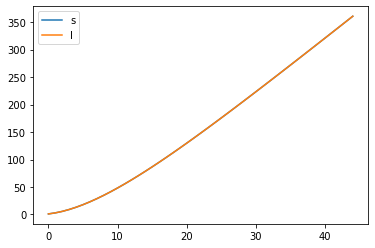

In [15]:
plt.plot(np.cumsum([x["Reward"] for x in run_stats_s]), label="s")
plt.plot(np.cumsum([x["Reward"] for x in run_stats_l]), label="l")
plt.legend()

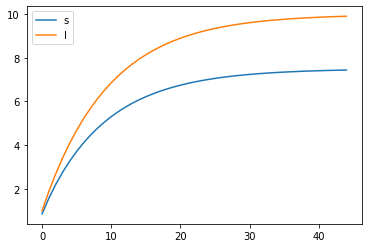

In [16]:
plt.plot([x["Mean V"] for x in run_stats_s], label="s")
plt.plot([x["Mean V"] for x in run_stats_l], label="l")
plt.legend()

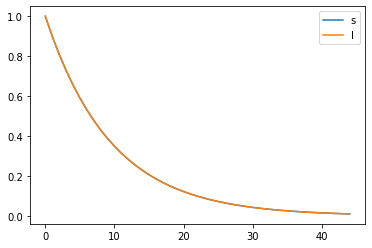

In [17]:
plt.plot([x["Error"] for x in run_stats_s], label="s")
plt.plot([x["Error"] for x in run_stats_l], label="l")
plt.legend()